In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



import matplotlib.pyplot as plt
import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [6]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [7]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [8]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.8390243902439024
Accuracy of Decision Trees 0.9804878048780488


In [11]:
confusion_matrix(y_test,y_pred1)

array([[82, 23],
       [10, 90]], dtype=int64)

In [22]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

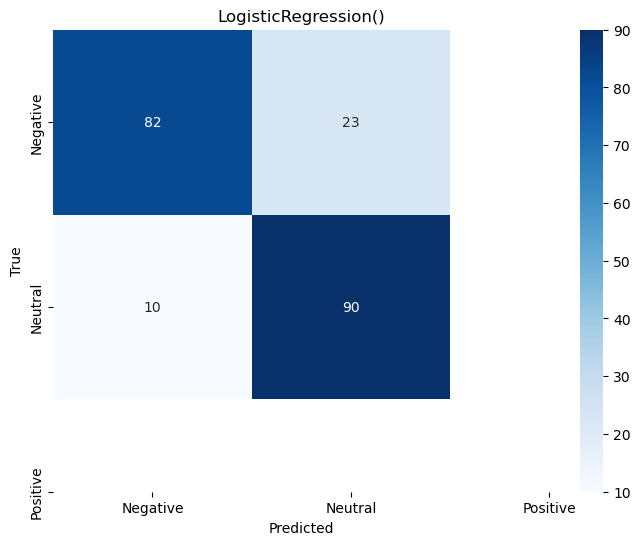

In [23]:
plot_confusion_matrix(y_test, y_pred1, clf1)

In [11]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,82,23
1,10,90


In [12]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))

Decision Tree Confusion Matrix



,0,1
0,101,4
1,0,100


In [13]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2

In [14]:
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
906,1,1,1
311,0,0,0
318,0,0,0
644,1,1,1
846,1,1,1
423,0,1,0
440,0,1,0
923,1,1,1
677,0,0,0
347,1,1,1


In [15]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [16]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score - ",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  82  23
1  10  90
--------------------------------------------------
Precision -  0.7964601769911505
Recall -  0.9
F1 score -  0.8450704225352113


In [17]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred2))
print("Recall - ",recall_score(y_test,y_pred2))
print("F1 score - ",f1_score(y_test,y_pred2))



For DT Model
--------------------------------------------------
     0    1
0  101    4
1    0  100
--------------------------------------------------
Precision -  0.9615384615384616
Recall -  1.0
F1 score -  0.9803921568627451


In [18]:
precision_score(y_test,y_pred1,average=None)

array([0.89130435, 0.79646018])

In [19]:
precision_score(y_test,y_pred2,average=None)

array([1.        , 0.96153846])

In [20]:
recall_score(y_test,y_pred2,average=None)

array([0.96190476, 1.        ])